In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [31]:
df = pd.read_csv('data/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## Preprocessing

In [4]:
data = df.dropna()
print("Length Before: ", len(df))
print("Length After: ", len(data))
print("Data Removed: ", len(df) - len(data))

Length Before:  558837
Length After:  472325
Data Removed:  86512


In [5]:
categorical_atribut = ['make', 'model', 'trim', 'body', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
data.drop(columns=categorical_atribut, inplace=True)
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_26980\3710748305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=categorical_atribut, inplace=True)


,year,transmission,condition,odometer,mmr,sellingprice
0,2015,automatic,5.0,16639.0,20500.0,21500.0
1,2015,automatic,5.0,9393.0,20800.0,21500.0
2,2014,automatic,45.0,1331.0,31900.0,30000.0
3,2015,automatic,41.0,14282.0,27500.0,27750.0
4,2014,automatic,43.0,2641.0,66000.0,67000.0


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['transmission_num'] = label_encoder.fit_transform(data['transmission'])
data.drop(columns=['transmission'], inplace=True)
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_26980\2632130699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission_num'] = label_encoder.fit_transform(data['transmission'])
C:\Users\hp\AppData\Local\Temp\ipykernel_26980\2632130699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['transmission'], inplace=True)


,year,condition,odometer,mmr,sellingprice,transmission_num
0,2015,5.0,16639.0,20500.0,21500.0,0
1,2015,5.0,9393.0,20800.0,21500.0,0
2,2014,45.0,1331.0,31900.0,30000.0,0
3,2015,41.0,14282.0,27500.0,27750.0,0
4,2014,43.0,2641.0,66000.0,67000.0,0


In [7]:
from sklearn.preprocessing import StandardScaler

X = data.values[:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

data_clean = pd.DataFrame(Clus_dataSet, columns=data.columns)
data_clean.head()

,year,condition,odometer,mmr,sellingprice,transmission_num
0,1.252966,-1.939826,-0.963866,0.698992,0.812386,-0.189432
1,1.252966,-1.939826,-1.103374,0.730464,0.812386,-0.189432
2,0.991333,1.070669,-1.258593,1.894936,1.696603,-0.189432
3,1.252966,0.769620,-1.009245,1.433343,1.462546,-0.189432
4,0.991333,0.920144,-1.233371,5.472277,5.545548,-0.189432


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              472325 non-null  float64
 1   condition         472325 non-null  float64
 2   odometer          472325 non-null  float64
 3   mmr               472325 non-null  float64
 4   sellingprice      472325 non-null  float64
 5   transmission_num  472325 non-null  float64
dtypes: float64(6)
memory usage: 21.6 MB


In [13]:
data_clean.drop(columns=['transmission_num'], inplace=True)
data_clean.head()

,year,condition,odometer,mmr,sellingprice
0,1.252966,-1.939826,-0.963866,0.698992,0.812386
1,1.252966,-1.939826,-1.103374,0.730464,0.812386
2,0.991333,1.070669,-1.258593,1.894936,1.696603
3,1.252966,0.769620,-1.009245,1.433343,1.462546
4,0.991333,0.920144,-1.233371,5.472277,5.545548


## Model

In [24]:
from sklearn.preprocessing import StandardScaler

data_clean = data_clean.sample(1000)

In [25]:
X = data_clean.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.17501347,  1.17171861,  0.23565574,  0.96661618,  1.64168606],
       [ 1.00345878,  0.87685391, -0.50182044, -0.09032512, -0.03294148],
       [ 0.73114975,  0.36084068, -0.24136258, -0.1716283 , -0.17204792],
       ...,
       [-2.2642496 , -2.14550929,  2.47500437, -1.20688875, -1.25279796],
       [-0.63039541, -1.99807694,  0.71358291, -0.56459365, -0.48236228],
       [-3.08117669, -0.22888873,  0.78436404, -1.26922118, -1.10299102]])

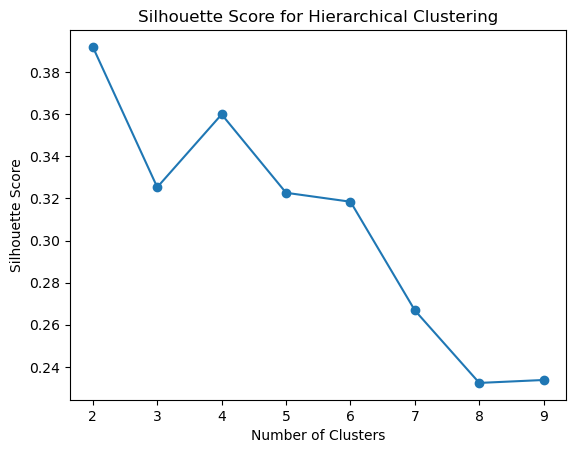

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
for n_clusters in range(2, 10):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [29]:
clusterNum = 2
hierarchical = AgglomerativeClustering(n_clusters=clusterNum)

labels = hierarchical.fit_predict(X)
data_clean["cluster"] = labels

print(data_clean)

            year  condition  odometer       mmr  sellingprice  cluster
240678 -1.101732   1.221194  0.274132  0.908806      1.566571        0
433077  0.991333   0.920144 -0.507007 -0.114040     -0.061428        0
412679  0.729700   0.393308 -0.231129 -0.192721     -0.196662        0
89282  -0.316832  -0.359316  1.219308 -0.667427     -0.852022        1
140042 -1.624998  -0.886152  1.208699 -1.050339     -1.070476        1
...          ...        ...       ...       ...           ...      ...
310359 -2.148264  -0.886152  0.970172 -1.291626     -1.309735        1
327691  0.729700  -0.434578 -1.169489  0.971751      0.718763        0
292458 -2.148264  -2.165613  2.646063 -1.194586     -1.247320        1
128074 -0.578465  -2.015088  0.780355 -0.573010     -0.498336        1
210399 -2.933163  -0.208791  0.855327 -1.254908     -1.101684        1

[1000 rows x 6 columns]


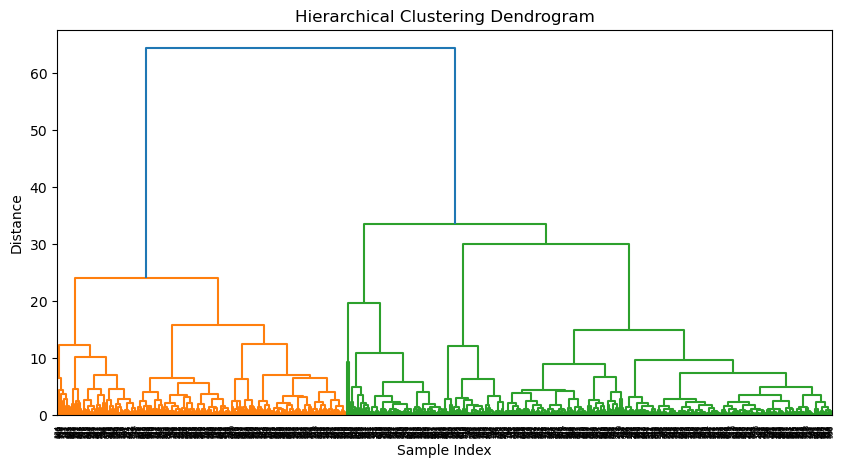

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()